In [1]:
cd "D:\Big Data"

D:\Big Data


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('weatherAUS.csv')

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
#There are too many missing values in Evaporation, Sunshine Cloud9am, Cloud3pm, so we will drop these columns
#and impute the other columns for missing values
#Also, there are some missing values for our target variable RainTomorrow and also for RainToday, we will drop the missing rows 
#of these two columns as well
df.isnull().sum(axis = 0)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<Axes: >

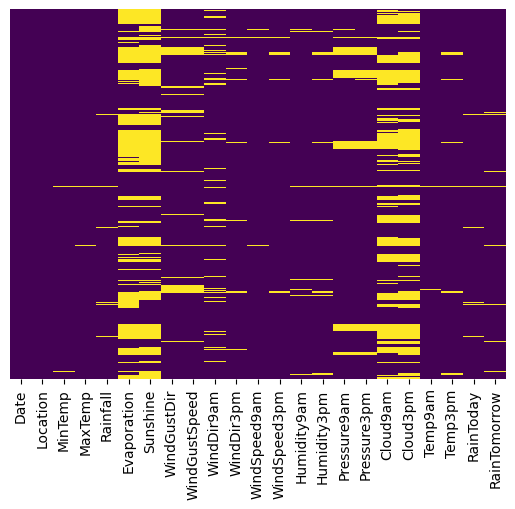

In [7]:
#This is a heatmap of the missing values. 
#Every yellow dash represents a missing value.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
#drop columns Evaporation, Sunshine, Cloud9am, Cloud3pm and also 'Date' and 'Location'
#and also null rows in columns RainToday and RainTomorrow
df.drop(['Evaporation','Sunshine', 'Cloud9am', 'Cloud3pm', 'Date', 'Location'], axis =1, inplace=True)
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace = True)

In [9]:
#There are too many missing values in Evaporation, Sunshine Cloud9am, Cloud3pm, so we will drop these columns
#and impute the other columns for missing values
df.isnull().sum(axis = 0)

MinTemp            468
MaxTemp            307
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

<Axes: >

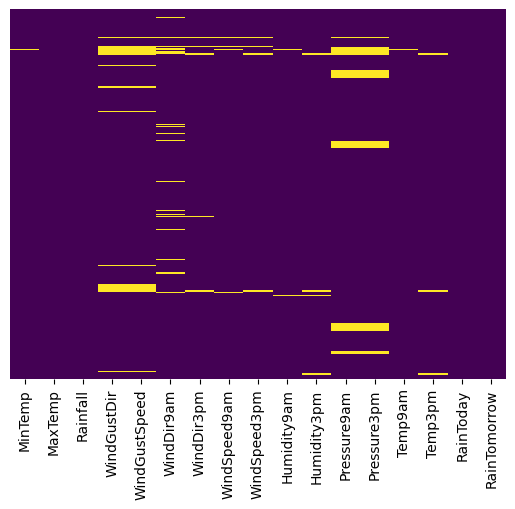

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        140319 non-null  float64
 1   MaxTemp        140480 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   WindGustDir    131624 non-null  object 
 4   WindGustSpeed  131682 non-null  float64
 5   WindDir9am     131127 non-null  object 
 6   WindDir3pm     137117 non-null  object 
 7   WindSpeed9am   139732 non-null  float64
 8   WindSpeed3pm   138256 non-null  float64
 9   Humidity9am    139270 non-null  float64
 10  Humidity3pm    137286 non-null  float64
 11  Pressure9am    127044 non-null  float64
 12  Pressure3pm    127018 non-null  float64
 13  Temp9am        140131 non-null  float64
 14  Temp3pm        138163 non-null  float64
 15  RainToday      140787 non-null  object 
 16  RainTomorrow   140787 non-null  object 
dtypes: float64(12), object(5)
mem

In [12]:
#Now we will start imputing all our columns, first we will check the column
#types, whether they are categorical or numerical features
df.isnull().sum(axis = 0)

MinTemp            468
MaxTemp            307
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [13]:
#Now we will start imputing all our columns, first we will check the column
#types, whether they are categorical or numerical features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [14]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [15]:
categorical_cols

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [16]:
#This is the easiest way to impute the missing numeric values.
#It imputes this missing values using the mean of the column values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

In [17]:
imputer.fit(df[numeric_cols]) 

SimpleImputer()

In [18]:
df[numeric_cols]= imputer.transform(df[numeric_cols])

In [19]:
imputercat = SimpleImputer(strategy = 'most_frequent')

In [20]:
imputercat.fit(df[categorical_cols])

SimpleImputer(strategy='most_frequent')

In [21]:
df[categorical_cols] = imputercat.transform(df[categorical_cols])

In [22]:
df.isnull().sum(axis = 0)

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<Axes: >

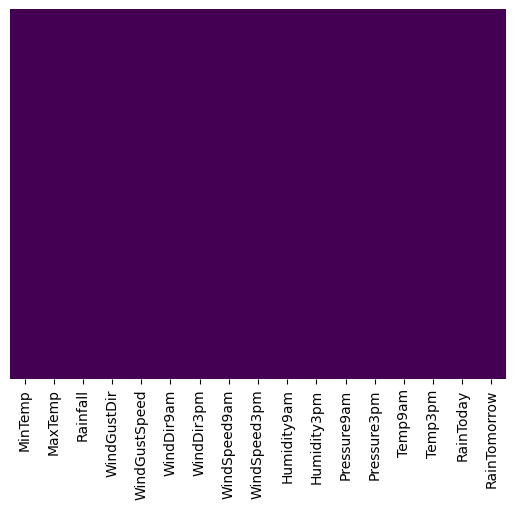

In [23]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [24]:
#Data Cleaned till this stage
#Now we need to encode categorical values for the model

In [25]:
df.head()


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [26]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [27]:
#now all categorical values are encoded to numerical values, which our model can understand.
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [28]:
#Just to make sure that all our values are either int or float.
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,140787.000000,140787.000000,140787.000000,140787.00000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.184824,23.235120,2.349974,8.05362,39.970520,7.006172,7.785740,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,16.987066,21.693183,0.223423,0.221618
std,6.393226,7.106739,8.465173,4.69313,13.131794,4.515248,4.547275,8.852853,8.718653,18.960664,20.546968,6.749189,6.682526,6.480860,6.872826,0.416541,0.415337
min,-8.500000,-4.800000,0.000000,0.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.00000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,0.000000,0.000000
50%,12.000000,22.700000,0.000000,9.00000,39.000000,7.000000,8.000000,13.000000,18.631141,70.000000,51.449288,1017.654577,1015.257963,16.800000,21.300000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,13.00000,46.000000,11.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000,0.000000,0.000000
max,33.900000,48.100000,371.000000,15.00000,135.000000,15.000000,15.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000


In [29]:
z_scores = (df - df.mean()) / df.std()

In [30]:
z_scores.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.190072,-0.047155,-0.206726,1.053962,0.306849,1.327464,1.366590,0.678821,0.615790,0.114615,-1.433267,-1.474929,-1.220790,-0.013434,0.015542,-0.536376,-0.533587
1,-0.748421,0.262410,-0.277605,1.267039,0.306849,-0.222839,1.586502,-1.128506,0.386397,-1.309386,-1.287260,-1.045248,-1.116039,0.032856,0.379293,-0.536376,-0.533587
2,0.111865,0.346837,-0.277605,1.480117,0.459151,1.327464,1.586502,0.565863,0.845183,-1.625831,-1.043915,-1.489746,-0.981360,0.619198,0.219243,-0.536376,-0.533587
3,-0.466873,0.670473,-0.277605,-0.863735,-1.216172,0.441577,-1.712177,-0.337800,-1.104659,-1.256645,-1.725281,-0.008086,-0.367819,0.171726,0.699395,-0.536376,-0.533587
4,0.831376,1.275533,-0.159474,1.053962,0.078396,-1.330198,-0.172794,-0.789632,0.157004,0.694763,-0.897908,-1.015615,-1.385399,0.125436,1.164996,-0.536376,-0.533587


In [31]:
outlier_indices = z_scores[(z_scores > 3) | (z_scores < -3)].dropna(how='all').index

In [32]:
outlier_indices

Int64Index([     8,     12,     52,     62,     68,    123,    267,    296,
               356,    381,
            ...
            145046, 145095, 145189, 145239, 145250, 145251, 145252, 145278,
            145279, 145393],
           dtype='int64', length=6838)

In [33]:
filtered_df = df.drop(outlier_indices)

In [34]:
filtered_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [35]:
filtered_df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000,133949.000000
mean,12.113283,23.281538,1.455044,8.016738,38.948289,6.979686,7.744149,13.480148,18.190077,68.804685,51.064788,1017.977463,1015.548204,16.954601,21.752566,0.205377,0.206720
std,6.352134,6.953651,3.841329,4.697560,11.744431,4.517195,4.550871,8.189204,8.160757,18.521501,20.102489,6.423382,6.390357,6.393949,6.720153,0.403978,0.404955
min,-6.900000,2.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,997.500000,995.300000,-2.400000,1.100000,0.000000,0.000000
25%,7.500000,18.000000,0.000000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.900000,1011.400000,12.300000,16.800000,0.000000,0.000000
50%,11.900000,22.700000,0.000000,9.000000,39.000000,7.000000,8.000000,13.000000,18.631141,69.000000,51.449288,1017.654577,1015.257963,16.700000,21.400000,0.000000,0.000000
75%,16.700000,28.200000,0.600000,12.000000,46.000000,11.000000,12.000000,19.000000,24.000000,82.000000,65.000000,1022.000000,1019.600000,21.500000,26.300000,0.000000,0.000000
max,31.000000,44.500000,27.600000,15.000000,78.000000,15.000000,15.000000,39.000000,44.000000,100.000000,100.000000,1037.900000,1035.300000,36.400000,42.300000,1.000000,1.000000


In [36]:
#Just to make sure that all our values are either int or float.
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133949 entries, 0 to 145458
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        133949 non-null  float64
 1   MaxTemp        133949 non-null  float64
 2   Rainfall       133949 non-null  float64
 3   WindGustDir    133949 non-null  int32  
 4   WindGustSpeed  133949 non-null  float64
 5   WindDir9am     133949 non-null  int32  
 6   WindDir3pm     133949 non-null  int32  
 7   WindSpeed9am   133949 non-null  float64
 8   WindSpeed3pm   133949 non-null  float64
 9   Humidity9am    133949 non-null  float64
 10  Humidity3pm    133949 non-null  float64
 11  Pressure9am    133949 non-null  float64
 12  Pressure3pm    133949 non-null  float64
 13  Temp9am        133949 non-null  float64
 14  Temp3pm        133949 non-null  float64
 15  RainToday      133949 non-null  int32  
 16  RainTomorrow   133949 non-null  int32  
dtypes: float64(12), int32(5)
memo

In [37]:
filtered_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


<Axes: xlabel='RainTomorrow', ylabel='count'>

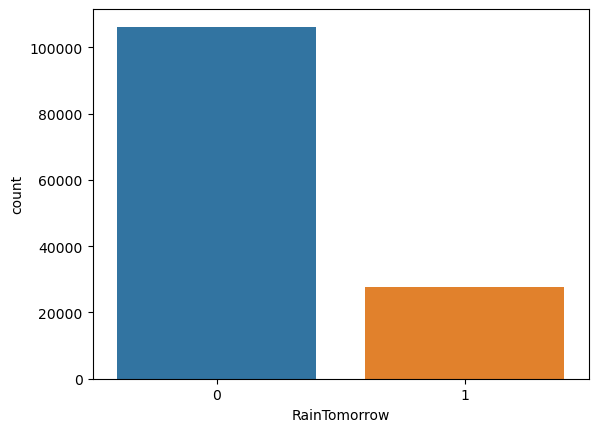

In [38]:
#Countplot of RainTomorrow variable
sns.countplot(x='RainTomorrow', data=filtered_df)

<Axes: >

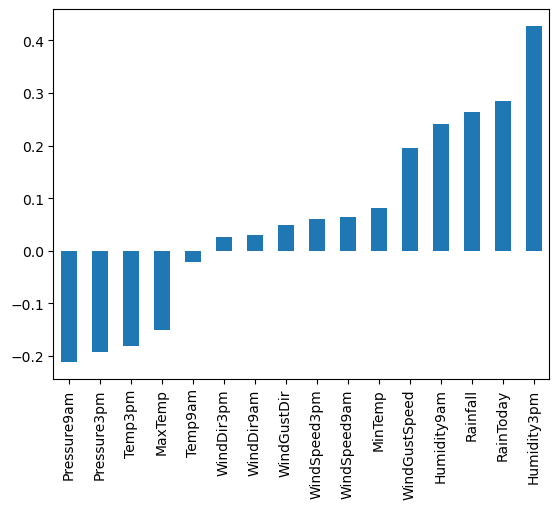

In [39]:
#This is how the features relate to the target variable
filtered_df.corr()['RainTomorrow'][:-1].sort_values().plot(kind='bar')

In [40]:
X = filtered_df.drop('RainTomorrow', axis=1).values
y = filtered_df['RainTomorrow'].values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.transform(X_test)

In [47]:
from tensorflow.keras.models import Sequential

In [48]:
from tensorflow.keras.layers import Dense, Dropout

In [49]:
X_train.shape

(93764, 16)

In [50]:
X_test.shape

(40185, 16)

In [51]:
# model = Sequential()

# model.add(Dense(16, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(16, activation='relu'))

# #Binary Classification problem
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
# model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

In [53]:
# losses = pd.DataFrame(model.history.history)

In [54]:
# losses.plot()

In [55]:
# predictions = (model.predict(X_test) > 0.5).astype("int32")

In [56]:
# from sklearn.metrics import classification_report, confusion_matrix

In [57]:
# print(classification_report(y_test, predictions))

In [58]:
# print(confusion_matrix(y_test, predictions))

In [59]:
# model = Sequential()

# model.add(Dense(16, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(16, activation='relu'))

# #Binary Classification problem
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam')

In [60]:
# from tensorflow.keras.callbacks import EarlyStopping

In [61]:
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [62]:
# model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
#           callbacks=[early_stop])

In [63]:
# model_loss = pd.DataFrame(model.history.history)
# model_loss.plot()

In [64]:
# from sklearn.metrics import classification_report, confusion_matrix

# print(classification_report(y_test, predictions))

# print(confusion_matrix(y_test, predictions))

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [66]:
model = Sequential()

#Input layer
model.add(Dense(16, activation='linear'))

#Hidden Layers
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

#Output layer for Binary Classification problem
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [67]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
2931/2931 [==============================] - 13s 4ms/step - loss: 0.3705 - val_loss: 0.3566
Epoch 2/600
2931/2931 [==============================] - 12s 4ms/step - loss: 0.3525 - val_loss: 0.3524
Epoch 3/600
2931/2931 [==============================] - 14s 5ms/step - loss: 0.3499 - val_loss: 0.3500
Epoch 4/600
2931/2931 [==============================] - 12s 4ms/step - loss: 0.3482 - val_loss: 0.3522
Epoch 5/600
2931/2931 [==============================] - 11s 4ms/step - loss: 0.3467 - val_loss: 0.3477
Epoch 6/600
2931/2931 [==============================] - 12s 4ms/step - loss: 0.3458 - val_loss: 0.3470
Epoch 7/600
2931/2931 [==============================] - 13s 4ms/step - loss: 0.3447 - val_loss: 0.3472
Epoch 8/600
2931/2931 [==============================] - 12s 4ms/step - loss: 0.3440 - val_loss: 0.3467
Epoch 9/600
2931/2931 [==============================] - 11s 4ms/step - loss: 0.3436 - val_loss: 0.3441
Epoch 10/600
2931/2931 [==============================] - 12s 4m

In [77]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
#plt.savefig('Loss plot for ANN final.png')

TypeError: no numeric data to plot

In [69]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

1256/1256 [==============================] - 2s 2ms/step


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     31944
           1       0.69      0.50      0.58      8241

    accuracy                           0.85     40185
   macro avg       0.79      0.72      0.75     40185
weighted avg       0.84      0.85      0.84     40185



In [72]:
print(confusion_matrix(y_test, predictions))

[[30125  1819]
 [ 4131  4110]]


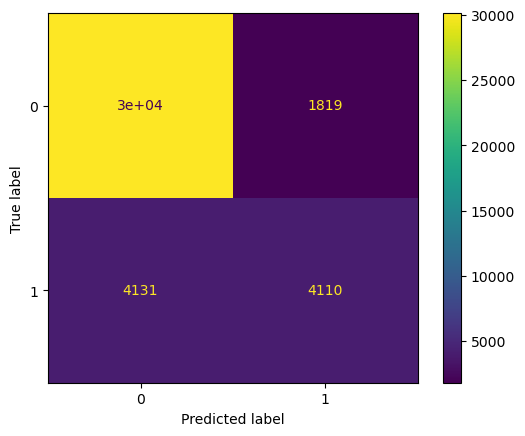

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
#plt.savefig('CF for ANN.png')

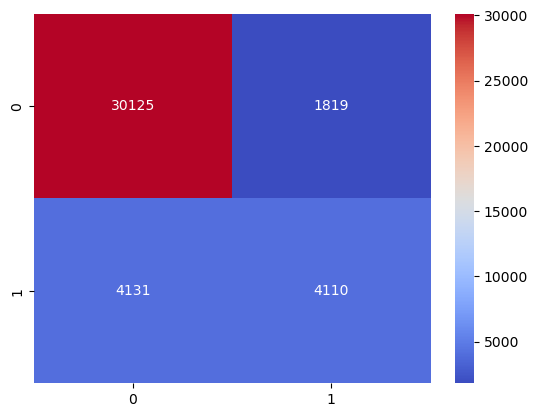

In [75]:
sns.heatmap(confusion_matrix(y_test, predictions), cmap="coolwarm", annot=True, fmt='g')
#plt.savefig('ANN Matrix Final.png')